In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [2]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
dframe1 = DataFrame(arr,index=['A','B'],columns = ['One','Two','Three'])
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [3]:
# 合計を求めるsumの動きを確認しましょう。
#行方向に計算が進むので、列の合計が見られます。
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [4]:
#行の合計を求めたいときは、列方向（axis=1）で計算
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [5]:
# 最小値を求める。
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [6]:
# 最小値を保持しているindexを調べられます。
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [11]:
# maxでも同じことができます。

In [7]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [8]:
# 累積を求めることができます。
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [9]:
# DataFrameの全体像を簡単に見ることができます。
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [15]:
# 共分散（covariance）と相関（correlation）
# 次の動画が参考になります。

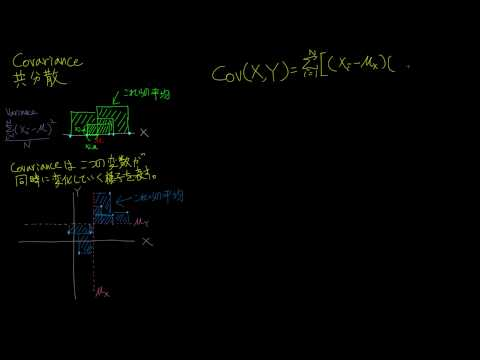

In [11]:
from IPython.display import YouTubeVideo
# 共分散の説明（英語）
YouTubeVideo('xFNqBeYgvuw')

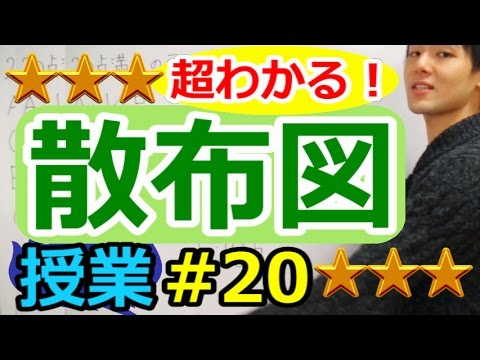

In [12]:
# 相関の説明
YouTubeVideo('9V4N8-cJbGo')

In [14]:
# 株価のデータを使って、共分散と相関をみていきましょう。
# PandasはWebからデータをとってくることも可能です。
import pandas_datareader.data as pdweb
# 日付を扱うために、datetimeをimportします。
import datetime
# 米国のYahooのサービスを使って、株価を取得します。
# すべて石油関連会社
# CVX シェブロン、XOM エクソンモービル、BP 英BP
prices = pdweb.get_data_yahoo(['CVX','XOM','BP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Adj Close']
prices.head()

,BP,CVX,XOM
Date,,,
2012-12-31,30.764978,89.044411,73.702042
2012-12-28,30.454672,87.652817,72.467316
2012-12-27,30.750202,89.357307,73.966042
2012-12-26,30.794535,89.307907,74.144867
2012-12-24,30.824091,89.447861,74.017120


In [15]:
# 出来高（何株売買されたか）のデータも取れます
volume = pdweb.get_data_yahoo(['CVX','XOM','BP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Volume']
volume.head()

,BP,CVX,XOM
Date,,,
2012-12-31,6353800.0,6554000.0,19810800.0
2012-12-28,4196000.0,5277100.0,13358700.0
2012-12-27,4664200.0,5525700.0,14258500.0
2012-12-26,2819800.0,4094300.0,10737800.0
2012-12-24,2415200.0,2284400.0,6385200.0


In [16]:
# 変化の割合を計算できます。
rets = prices.pct_change()

In [17]:
rets.head()

,BP,CVX,XOM
Date,,,
2012-12-31,NaN,NaN,NaN
2012-12-28,-0.010086,-0.015628,-0.016753
2012-12-27,0.009704,0.019446,0.020681
2012-12-26,0.001442,-0.000553,0.002418
2012-12-24,0.000960,0.001567,-0.001723


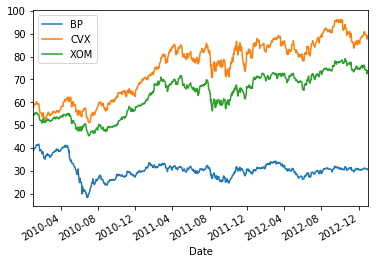

In [18]:
# まず、単純な株価の変化を描画してみます。
%matplotlib inline
prices.plot()

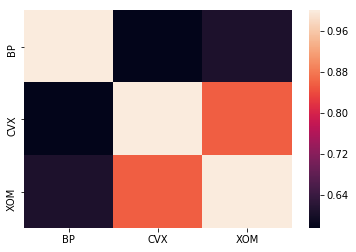

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# 予想通りの相関が見られます。
sns.heatmap(rets.corr())
# seabornについては、後ほど詳しく学習します。

In [20]:
ser1 = Series(['w','w','x', 'y', 'z' ,'w' ,'w' ,'x' ,'x' ,'y' ,'a' ,'z' ])
ser1

0     w
1     w
2     x
3     y
4     z
5     w
6     w
7     x
8     x
9     y
10    a
11    z
dtype: object

In [21]:
#  重複するデータをまとめられます。
ser1.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [22]:
# それぞれのデータがいくつあるかもわかります。
ser1.value_counts()

w    4
x    3
y    2
z    2
a    1
dtype: int64